In [3]:
import numpy as np
import pandas as pd

In [16]:
dfBooks = pd.read_csv('books.csv')
dfRatings = pd.read_csv('ratings.csv')
dfToRead = pd.read_csv('to_read.csv')
dfTags = pd.read_csv('tags.csv')
dfBTags = pd.read_csv('book_tags.csv')

## Listar as colunas dos DataFrames

In [24]:
print('--**********-- Columns dfBooks --*************--\n')
print(dfBooks.columns)
print('\n--**********-- Columns dfRatings --**********--\n')
print(dfRatings.columns)
print('\n--**********-- Columns dfToRead --**********--\n')
print(dfToRead.columns)
print('\n--**********-- Columns dfTags --**********--\n')
print(dfTags.columns)
print('\n--**********-- Columns dfBTags --**********--\n')
print(dfBTags.columns)

--**********-- Columns dfBooks --*************--

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

--**********-- Columns dfRatings --**********--

Index(['user_id', 'book_id', 'rating'], dtype='object')

--**********-- Columns dfToRead --**********--

Index(['user_id', 'book_id'], dtype='object')

--**********-- Columns dfTags --**********--

Index(['tag_id', 'tag_name'], dtype='object')

--**********-- Columns dfBTags --**********--

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')


In [28]:
dfRatings.head()


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [29]:
dfToRead.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [30]:
dfBTags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [32]:
dfTags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


### Selecionar algumas colunas do dataframe para utilizar na análise

In [45]:
#'book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
#        'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
#        'original_title', 'title', 'language_code', 'average_rating',
#        'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
#        'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
#        'image_url', 'small_image_url']
dfBook_id = pd.concat([dfBooks['book_id'],dfBooks['title']],axis=1)
dfBook_id.head()

,book_id,title
0,1,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird
4,5,The Great Gatsby


### Aqui une as colunas que selecionei para o DataFrame de Ratings

In [46]:
df = pd.merge(dfRatings,dfBook_id,on='book_id')
df.head()

,user_id,book_id,rating,title
0,1,258,5,The Shadow of the Wind (The Cemetery of Forgot...
1,11,258,3,The Shadow of the Wind (The Cemetery of Forgot...
2,143,258,4,The Shadow of the Wind (The Cemetery of Forgot...
3,242,258,5,The Shadow of the Wind (The Cemetery of Forgot...
4,325,258,4,The Shadow of the Wind (The Cemetery of Forgot...


### lista os números de 'usuários'

In [50]:
n_users = df.user_id.nunique()
n_books = df.book_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Books: '+ str(n_books))

Num. of Users: 53424
Num of Books: 10000


# Análise exploratória dos dados

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

DataFrames de ratings com classificação média e número de avaliações:

In [55]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
The Complete Calvin and Hobbes                             4.829876
ESV Study Bible                                            4.818182
Attack of the Deranged Mutant Killer Monster Snow Goons    4.768707
The Indispensable Calvin and Hobbes                        4.766355
The Revenge of the Baby-Sat                                4.761364
Name: rating, dtype: float64

In [56]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
The Hunger Games (The Hunger Games, #1)                     22806
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)    21850
To Kill a Mockingbird                                       19088
Twilight (Twilight, #1)                                     16931
The Great Gatsby                                            16604
Name: rating, dtype: int64

In [57]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"Angels (Walsh Family, #3)",3.562738
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",3.407080
#GIRLBOSS,3.476923
'Salem's Lot,3.938868
"'Tis (Frank McCourt, #2)",3.570413


Criando uma coluna para o número de classificações:

In [58]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"Angels (Walsh Family, #3)",3.562738,263
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",3.407080,113
#GIRLBOSS,3.476923,195
'Salem's Lot,3.938868,4433
"'Tis (Frank McCourt, #2)",3.570413,703


### Histogramas

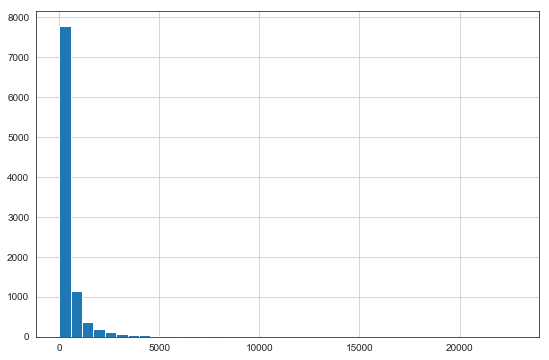

In [62]:
plt.figure(figsize=(9,6))
ratings['num of ratings'].hist(bins=40)

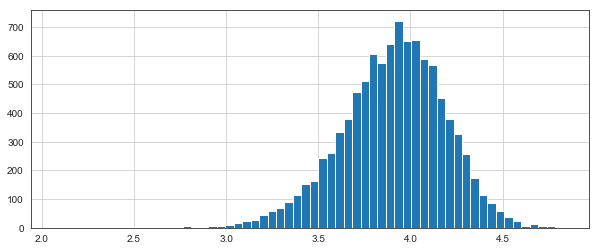

In [65]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=60)

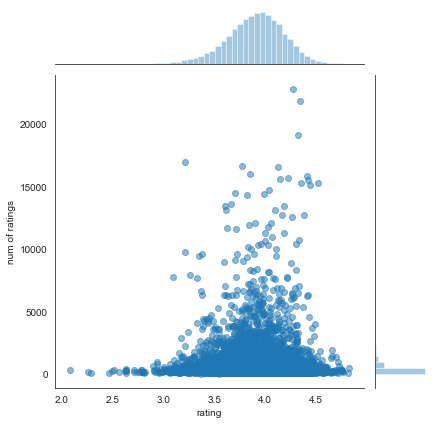

In [98]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recomendando livros semelhantes

Agora vamos criar uma matriz que tenha o ID dos usuários em um acesso e o título do livro em outro eixo. Cada célula irá consistir na classificação que o usuário deu a esse livro. Observe que haverá muitos valores de NaN, porque a maioria das pessoas não leu a maioria dos livros.

In [78]:
bookmat = df.pivot_table(index='user_id',columns='title',values='rating')
bookmat.head()

title,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,...,محال,مخطوطة بن إسحاق: مدينة الموتى,نادي السيارات,هشت کتاب,هيبتا,واحة الغروب,يوتوبيا,ڤيرتيجو,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mostrar os livros mais avaliados pelos usuários

In [100]:
ratings.sort_values('num of ratings',ascending=False).head(20)

,rating,num of ratings
title,,
"The Hunger Games (The Hunger Games, #1)",4.279707,22806
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.351350,21850
To Kill a Mockingbird,4.329369,19088
"Twilight (Twilight, #1)",3.214341,16931
The Great Gatsby,3.772224,16604
"Catching Fire (The Hunger Games, #2)",4.133422,16549
"Mockingjay (The Hunger Games, #3)",3.853131,15953
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",4.418732,15855
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",4.229418,15657


Selecionando alguns filmes para fazer a recomendação por semelhança

In [80]:
ratings.head()

,rating,num of ratings
title,,
"Angels (Walsh Family, #3)",3.562738,263
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",3.407080,113
#GIRLBOSS,3.476923,195
'Salem's Lot,3.938868,4433
"'Tis (Frank McCourt, #2)",3.570413,703


Pegar as avaliações dos usuários para esses livros selecionados:

In [102]:
huntergames_user_ratings = bookmat['The Hunger Games (The Hunger Games, #1)']
thehobbit_user_ratings = bookmat['The Hobbit']
greatgatsby_user_ratings = bookmat['The Great Gatsby']
killamockingbird_user_ratings = bookmat['To Kill a Mockingbird']
twilight_user_ratings = bookmat['Twilight (Twilight, #1)']
_1984_user_ratings = bookmat['1984']
animalfarm_user_ratings = bookmat['Animal Farm']
lordofflies_user_ratings = bookmat['Lord of the Flies']
# huntergames_user_ratings.head(20)

O método corrwith() para obter correlações entre duas séries de pandas:

In [104]:
similar_to_huntergames = bookmat.corrwith(huntergames_user_ratings)
similar_to_thehobbit = bookmat.corrwith(thehobbit_user_ratings)
similar_to_greatgatsby = bookmat.corrwith(greatgatsby_user_ratings)
similar_to_killamockingbird = bookmat.corrwith(killamockingbird_user_ratings)
similar_to_twilight = bookmat.corrwith(twilight_user_ratings)
similar_to_1984 = bookmat.corrwith(_1984_user_ratings)
similar_to_animalfarm = bookmat.corrwith(animalfarm_user_ratings)
similar_to_lordofflies = bookmat.corrwith(lordofflies_user_ratings)

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Agora temos que limpar isso removendo valores de NaN e usando um DataFrame:

In [126]:
corr_huntergames = pd.DataFrame(similar_to_huntergames,columns=['Correlation'])
corr_huntergames.dropna(inplace=True)
corr_thehobbit = pd.DataFrame(similar_to_thehobbit,columns=['Correlation'])
corr_thehobbit.dropna(inplace=True)
corr_greatgatsby = pd.DataFrame(similar_to_greatgatsby,columns=['Correlation'])
corr_greatgatsby.dropna(inplace=True)
corr_killamockingbird = pd.DataFrame(similar_to_killamockingbird,columns=['Correlation'])
corr_killamockingbird.dropna(inplace=True)
corr_twilight = pd.DataFrame(similar_to_twilight,columns=['Correlation'])
corr_twilight.dropna(inplace=True)
corr_1984 = pd.DataFrame(similar_to_1984,columns=['Correlation'])
corr_1984.dropna(inplace=True)
corr_animalfarm = pd.DataFrame(similar_to_animalfarm,columns=['Correlation'])
corr_animalfarm.dropna(inplace=True)
corr_lordofflies = pd.DataFrame(similar_to_lordofflies,columns=['Correlation'])
corr_lordofflies.dropna(inplace=True)
corr_huntergames.head()

,Correlation
title,
"Angels (Walsh Family, #3)",0.244984
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",0.036703
#GIRLBOSS,0.133575
'Salem's Lot,0.161504
"'Tis (Frank McCourt, #2)",0.104885


Agora, se classificarmos o quadro de dados por correlação, devemos obter os livros mais parecidos, no entanto, notemos que obtemos alguns resultados que realmente não fazem sentido. Isso ocorre porque há muitos livros apenas lidos uma vez por usuários que também leram a The Hunter Games (foi o livro mais popular).

In [127]:
corr_huntergames.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"The Hunger Games (The Hunger Games, #1)",1.000000
استمتع بحياتك,0.944911
"Jake Undone (Jake, #1)",0.828600
Baking: From My Home to Yours,0.814283
See You at the Top,0.814279
عائد إلى حيفا,0.750000
"Life is What You Make It: A Story of Love, Hope and How Determination Can Overcome Even Destiny",0.742359
"The Hunger Games Trilogy Boxset (The Hunger Games, #1-3)",0.684692
المانيفستو,0.677908


In [128]:
corr_thehobbit.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Addicted,1.0
"Reasonable Doubt: Volume 1 (Reasonable Doubt, #1)",1.0
"Connected (Connections, #1)",1.0
Nantucket Nights,1.0
"Until Trevor (Until, #2)",1.0
2 ضباط,1.0
The Hobbit,1.0
Kindle User's Guide,1.0
ليتها تقرأ,1.0


In [129]:
corr_greatgatsby.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
ليتها تقرأ,1.000000
في ديسمبر تنتهي كل الأحلام,1.000000
The Great Gatsby,1.000000
"The Magic (The Secret, #3)",0.951662
"Rock Chick Rescue (Rock Chick, #2)",0.939567
The Baller: A Down and Dirty Football Novel,0.918559
"Tokyo Mew Mew, Vol. 1 (Tokyo Mew Mew, #1)",0.911910
Anti-Stepbrother,0.902439
"Tales from a Not-So-Smart Miss Know-It-All (Dork Diaries, #5)",0.901155


In [130]:
corr_killamockingbird.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Tyrant (King, #2)",1.000000
"Cage (Corps Security, #2)",1.000000
Kindle User's Guide,1.000000
To Kill a Mockingbird,1.000000
Anti-Stepbrother,0.858984
The Scrapbook of Frankie Pratt,0.850420
أنت لي,0.840168
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",0.816497
"Damaged 2 (Damaged, #2)",0.790068


In [131]:
corr_twilight.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Twilight (Twilight, #1)",1.000000
La Carte et le territoire,0.952579
"The Twilight Saga (Twilight, #1-4)",0.893485
The Honest Truth About Dishonesty: How We Lie to Everyone - Especially Ourselves,0.893315
"The Twilight Saga Complete Collection (Twilight, #1-4 + 3.5)",0.887020
"The Twilight Collection (Twilight, #1-3)",0.869397
"Eclipse (Twilight, #3)",0.831682
The Pragmatic Programmer: From Journeyman to Master,0.823055
"The Faithful Spy (John Wells, #1)",0.816161


In [132]:
corr_1984.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Pucked (Pucked, #1)",1.0
"Ride Steady (Chaos, #3)",1.0
Winter Stroll (Winter #2),1.0
True Love Story,1.0
"Fall From Grace (Mad World, #1)",1.0
"Magic Binds (Kate Daniels, #9)",1.0
"Royally Screwed (Royally, #1)",1.0
"One More Chance (Rosemary Beach, #8; Chance, #2)",1.0
Willing Captive,1.0


In [133]:
corr_animalfarm.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Animal Farm,1.0
"Forever You (Forever, #2)",1.0
The Wall of Winnipeg and Me,1.0
Drawing from Memory,1.0
"Hero (Hero, #1)",1.0
"Fall From Grace (Mad World, #1)",1.0
"Until Trevor (Until, #2)",1.0
"Shine Not Burn (Shine Not Burn, #1)",1.0
"The Beast (Black Dagger Brotherhood, #14)",1.0


In [134]:
corr_lordofflies.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Diary of a Wimpy Kid: #1-4,1.0
Obsession,1.0
"Bad Romeo (Starcrossed, #1)",1.0
"Found in You (Fixed, #2)",1.0
"Hot Ticket (Sinners on Tour, #3)",1.0
"Sweet Filthy Boy (Wild Seasons, #1)",1.0
"King (King, #1)",1.0
"Fifty Shades Duo: Fifty Shades Darker / Fifty Shades Freed (Fifty Shades, #2-3)",1.0
Lord of the Flies,1.0


filtrando livros com menos de 4000 avaliações (esse valor foi escolhido com base no histograma anterior).
Filtrei por 1000 pq acima disso é uma valor muito alto para filtrar

In [135]:
corr_huntergames = corr_huntergames.join(ratings['num of ratings'])
corr_huntergames.head()

,Correlation,num of ratings
title,,
"Angels (Walsh Family, #3)",0.244984,263
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",0.036703,113
#GIRLBOSS,0.133575,195
'Salem's Lot,0.161504,4433
"'Tis (Frank McCourt, #2)",0.104885,703



Agora, classifique os valores e observe como os títulos têm muito mais sentido:

In [136]:
corr_huntergames[corr_huntergames['num of ratings']>1000].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
"The Hunger Games (The Hunger Games, #1)",1.000000,22806
"The Hunger Games Trilogy Boxset (The Hunger Games, #1-3)",0.684692,1144
"Catching Fire (The Hunger Games, #2)",0.669657,16549
"Mockingjay (The Hunger Games, #3)",0.533155,15953
"Divergent (Divergent, #1)",0.371507,11780


In [137]:
corr_thehobbit = corr_thehobbit.join(ratings['num of ratings'])
corr_thehobbit.head()

,Correlation,num of ratings
title,,
"Angels (Walsh Family, #3)",0.090516,263
#GIRLBOSS,0.163567,195
'Salem's Lot,0.219629,4433
"'Tis (Frank McCourt, #2)",0.221454,703
"1,000 Places to See Before You Die",0.133680,398


In [142]:
corr_thehobbit[corr_thehobbit['num of ratings']>1000].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
The Hobbit,1.000000,15558
The Hobbit: Graphic Novel,0.730747,1782
"The Fellowship of the Ring (The Lord of the Rings, #1)",0.640219,12530
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings,0.614821,1400
"The Lord of the Rings (The Lord of the Rings, #1-3)",0.581604,5316


In [143]:
corr_twilight = corr_twilight.join(ratings['num of ratings'])
corr_twilight[corr_twilight['num of ratings']>1000].sort_values('Correlation',ascending=False).head()

# corr_[corr_thehobbit['num of ratings']>1000].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
"Twilight (Twilight, #1)",1.000000,16931
"Eclipse (Twilight, #3)",0.831682,9620
"New Moon (Twilight, #2)",0.815995,9712
"Breaking Dawn (Twilight, #4)",0.775193,9433
"Midnight Sun (Twilight, #1.5)",0.731069,1286


In [144]:
corr_killamockingbird = corr_killamockingbird.join(ratings['num of ratings'])
corr_killamockingbird[corr_killamockingbird['num of ratings']>1000].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
To Kill a Mockingbird,1.000000,19088
Of Mice and Men,0.370300,11921
Stuart Little,0.357068,1314
The Diary of a Young Girl,0.346218,12101
Make Way for Ducklings,0.343007,1065


In [145]:
corr_greatgatsby = corr_greatgatsby.join(ratings['num of ratings'])
corr_greatgatsby[corr_greatgatsby['num of ratings']>1000].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
The Great Gatsby,1.000000,16604
The Catcher in the Rye,0.376523,14472
The Sun Also Rises,0.351939,4161
Tender Is the Night,0.348691,1201
The Glass Menagerie,0.332988,1527


In [146]:
corr_1984 = corr_1984.join(ratings['num of ratings'])
corr_1984[corr_1984['num of ratings']>1000].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
1984,1.000000,14693
Animal Farm / 1984,0.593738,1404
Animal Farm,0.562481,14328
Brave New World,0.514027,9612
Fahrenheit 451,0.454206,10312


In [147]:
corr_animalfarm = corr_animalfarm.join(ratings['num of ratings'])
corr_animalfarm[corr_animalfarm['num of ratings']>1000].sort_values('Correlation',ascending=False).head()


,Correlation,num of ratings
title,,
Animal Farm,1.000000,14328
Animal Farm / 1984,0.726908,1404
1984,0.562481,14693
Lord of the Flies,0.478259,13556
Brave New World,0.418204,9612


In [148]:
corr_lordofflies = corr_lordofflies.join(ratings['num of ratings'])
corr_lordofflies[corr_lordofflies['num of ratings']>1000].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Lord of the Flies,1.000000,13556
Animal Farm,0.478259,14328
Of Mice and Men,0.441520,11921
The Island of Dr. Moreau,0.384029,1022
1984,0.378063,14693
